In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import data_cleaning as dc
import matplotlib.pyplot as plt

# Gather some Insights About the Data

In [13]:
df = pd.read_csv("telco_data.csv")
df = df.drop(columns=["customerID"])
target = "Churn"
df[target] = df[target].apply(lambda x: 0 if x == "No" else 1)


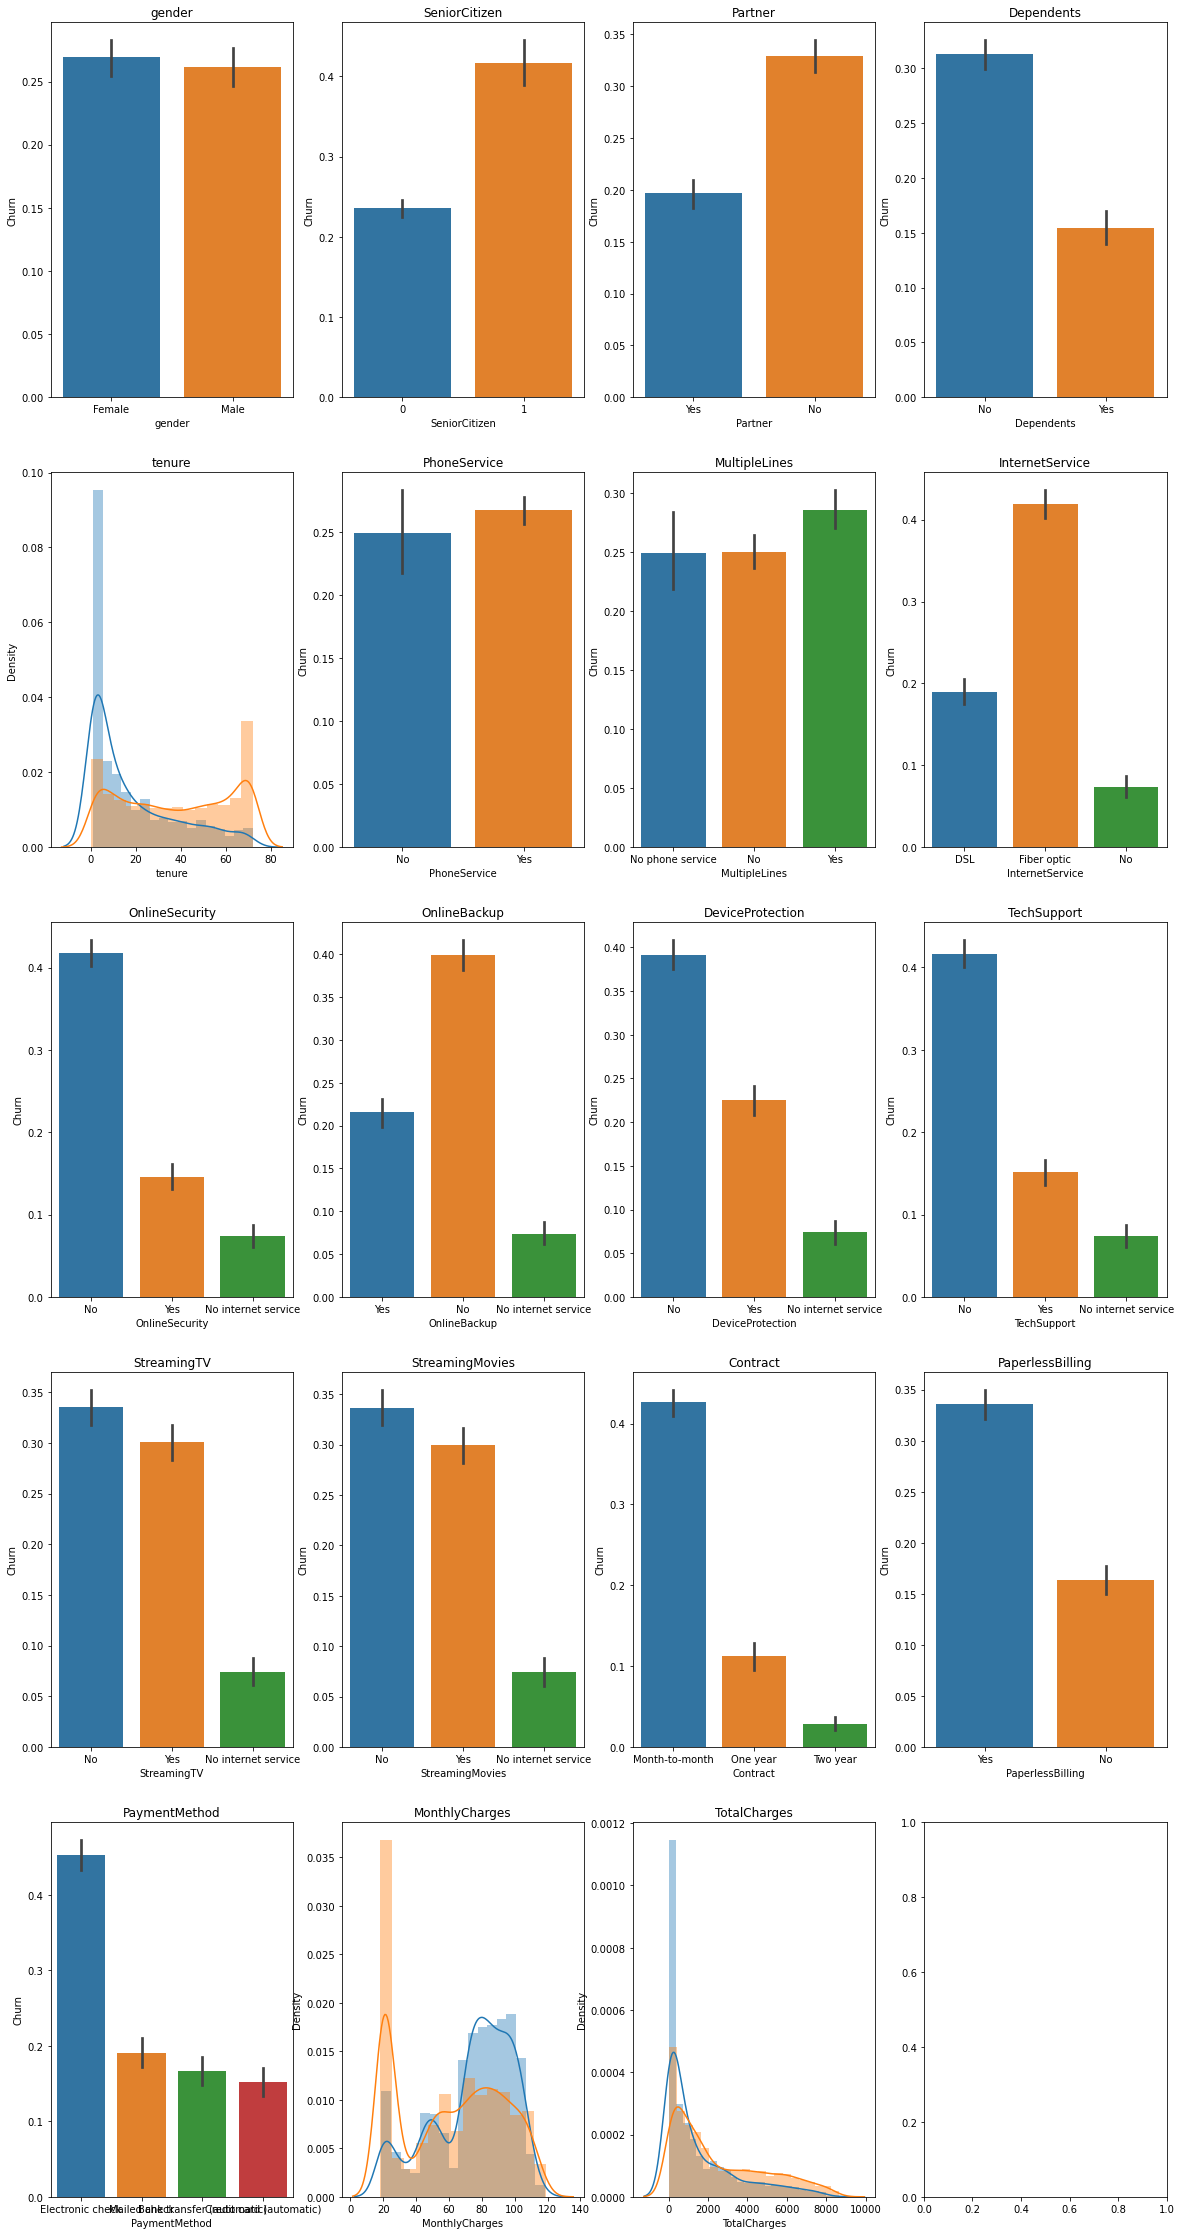

In [14]:
import warnings
warnings.filterwarnings('ignore')
idx = 0
fig, axes = plt.subplots(5, 4, figsize=(20, 40))
for col in df.columns:
    if col != target:
        if df.dtypes[col] == object or df[col].unique().shape[0] <= 5:
            sns.barplot(x=col, y=target, data=df, ax=axes[idx // 4, idx % 4], );
            axes[idx // 4, idx % 4].set_title(col)
        else: 
            sns.distplot(df[df[target] == 1][col], hist=True, label="Yes", ax=axes[idx // 4, idx % 4]);
            sns.distplot(df[df[target] == 0][col], hist=True, label="No", ax=axes[idx // 4, idx % 4]);
            axes[idx // 4, idx % 4].set_title(col)
        idx += 1

<AxesSubplot:xlabel='Churn', ylabel='index'>

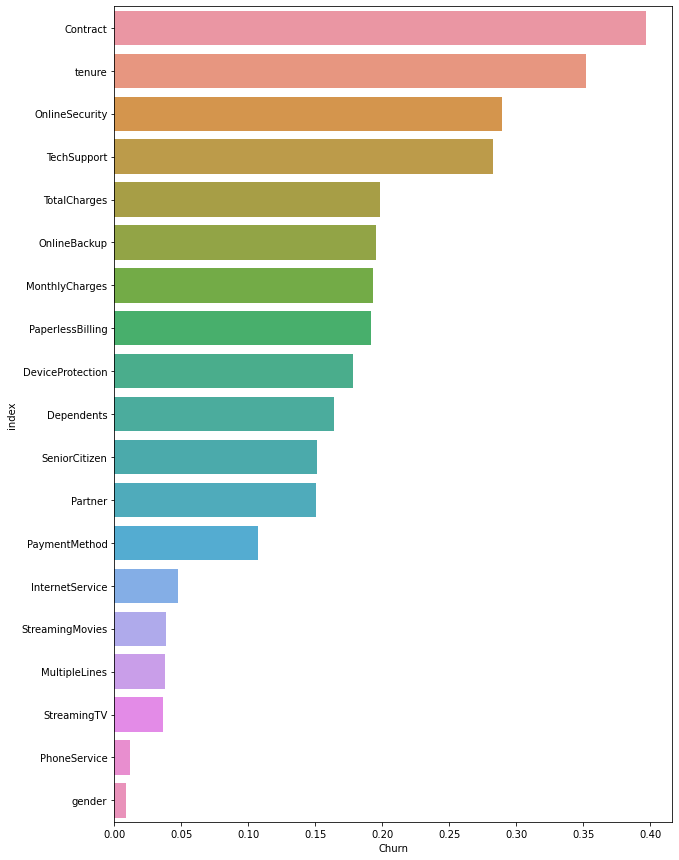

In [7]:
# ordinal encoding of the dataset 
for col in dc.non_numerical_features(df):
    df, _ = dc.feature_ordinalEncoding(df, col)

# correlation with Salesprice (first 20)
fig, ax = plt.subplots(figsize=(10, 15))

# computation of the correlation with target, will be used later 
correlations = df.corr()[target].reset_index()
correlations[target] = np.abs(correlations[target])
correlations = correlations.sort_values([target], ascending=False).reset_index(drop=True)
sns.barplot(ax=ax, y="index", x=target, data=correlations[1:40], orient="h")

**Remarks:** Clear trends in the data can be extracted. Some features should be removed such as gender (useless bias). 